In [1]:
import pandas as pd
data=pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [3]:
#Make a column for year & month using apply method 
data['year']=data['Date'].apply(lambda x:(x.split('/')[-1]))
data['month']=data['Date'].apply(lambda x:int(x.split('/')[0]))
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10


In [4]:
#Remove the Flight #, cn/in columns 
newdata=data.drop(['Flight #','cn/In'],axis=1)
newdata.head()

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,year,month
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10


In [22]:
#Which year had the most airplane crashes?
a=data['year'].value_counts().tolist()
b=max(a)
fil=list(data['year'].value_counts().index)
fil[a.index(b)]

'1972'

In [6]:
#Which operator had the most crashes?
a=data['Operator'].value_counts().tolist()
b=max(a)
fil=list(data['Operator'].value_counts().index)
fil[a.index(b)]

'Aeroflot'

In [7]:
#Which Route is the least risky?
a=data['Route'].value_counts().tolist()
b=min(a)
fil=list(data['Route'].value_counts().index)
fil[a.index(b):]

['Entebbe, Uganda - Luxor, Egypt - Niklaev, Ukraine',
 'Buffalo - Chicago',
 'Guangzhou - Shanghi',
 'Bamiyan - Kabul',
 'Colombo - Kalmunai',
 'Kamina - Jamba',
 'Grand Canyon NP - Las Vegas',
 'Kaunas - Ryazan / Moscow - Gomel',
 'Timika - Enarotali',
 'Dallas/Fort Worth, TX - Salt Lake City, UT',
 'El Paso - Dallas',
 'Los Angeles - Kansas City, MO',
 'Moroni Hahaya - Anjouan',
 'Nagpur - Delhi',
 'Buknavu - Uvira',
 'Taipei - Macau',
 'Tofino - Vancouver',
 'Pocatello - Salt Lake City',
 'Belem - Cachimbo',
 'Channel Islands - Southhampton',
 'Springfield, Il - Carbondale, IL',
 'Mendoza, Argentina - Santiago, Chili',
 'San Francisco - Hawaii',
 'Poliny Osipenko - Nikolayevsk-on-Amur',
 'Francistown - Malawi',
 'Aspen - Denver',
 'Sao Jose dos Campo - Manaus',
 'Panama City - Fort de France, Martinique',
 'Campeche - Mérida',
 'Hanoi - Na San',
 'Larnaca, Cyprus - Athens, Greece - Prague, Czech Republic',
 'Dallas -  Atlanta',
 'Vieques, PR - St. Croix, VI',
 'Copan - Nuovo Octopeq

In [8]:
#How many total fatalities occurred in year 1972?
a=(data['year']=='1972')
b=data[a]
b['Fatalities'].sum()

2937.0

In [9]:
#-How much percent of people survived in the entire dataset?
a=data.dropna(subset=['Aboard'])
tot_Ab=a['Aboard'].sum()

b=data.dropna(subset=['Fatalities'])
tot_Fa=b['Fatalities'].sum()

percent=((tot_Ab-tot_Fa)/tot_Ab)*100

print(percent)

27.029906399817367


In [10]:
#How many planes were such that there was no registration, and yet the number of people who survived were greater than 40%?
total=0
data["Percentage"]=(data["Aboard"]-data["Fatalities"])/data["Aboard"]
a=data[(data['Registration'].isnull())]
for i in a['Percentage']:
    if i>=0.04:
        total=total+1
print(total,'is the total number of planes having no Registration in which 40% people are alive.')        


59 is the total number of planes having no Registration in which 40% people are alive.


In [11]:
#-Which type of aircraft is used by most operators?
a=max(data['Type'].value_counts().tolist())
b=data['Type'].value_counts().tolist()
Type=list(data['Type'].value_counts().index)
Type[b.index(a)]

'Douglas DC-3'

In [32]:
#Which operator has the least & most people involved in deaths?
grouped_data=data.groupby(["Operator"])
a=[]
for name,group in grouped_data:
    a.append(group['Fatalities'].sum())
for name,group in grouped_data:
    if(group['Fatalities'].sum()==max(a)):
        print('operator with most people involved in death:%s'%name)
    elif(group['Fatalities'].sum()==min(a)):
        print('operator with least people involved in death:%s'%name)

operator with most people involved in death:Aeroflot
operator with least people involved in death:American International Airways
operator with least people involved in death:Ararat Avia
operator with least people involved in death:Canadian Air Transat
operator with least people involved in death:Centurian Air Cargo
operator with least people involved in death:Hewa Bora Airways
operator with least people involved in death:Island Sky Ferry - Air Taxi
operator with least people involved in death:Military - Ejército del Aire
operator with least people involved in death:Military - U.S. Air Force / Military U.S. Air Force
operator with least people involved in death:Military - Ukraine Air Force
operator with least people involved in death:Military U.S. Navy
operator with least people involved in death:Regional Compagnie Aerienne Europeenne
operator with least people involved in death:Southwest Airlines
operator with least people involved in death:US Airways
operator with least people involve

# plotting

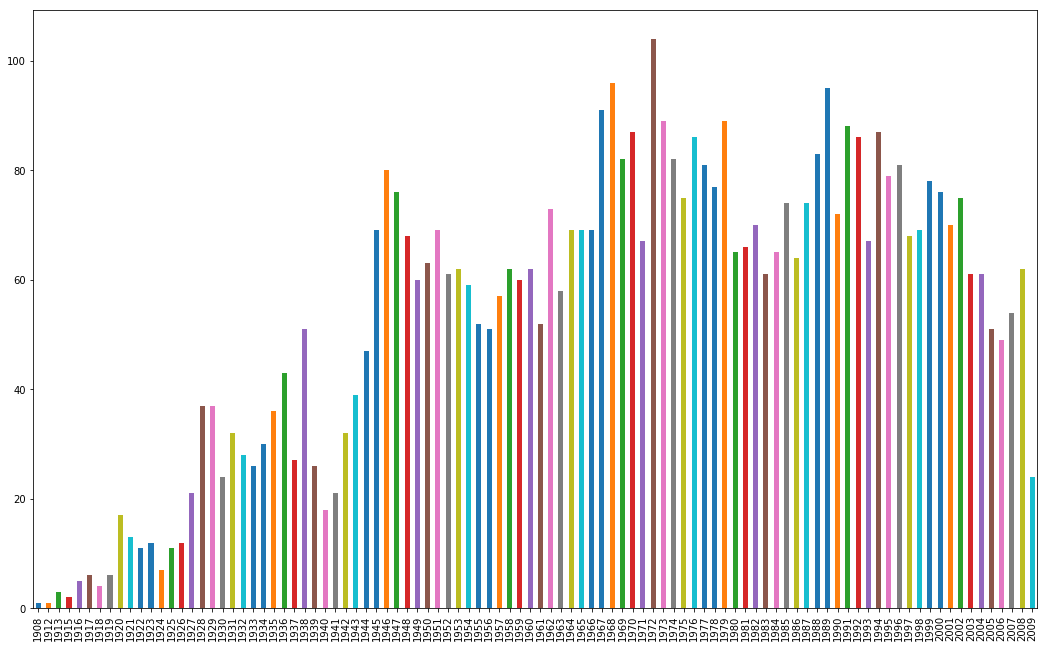

In [20]:
#Number of crashes per year
import matplotlib.pyplot as plt
plt.figure(figsize=(18,11))
data["year"].value_counts().sort_index(axis=0,ascending=True).plot(kind="bar")

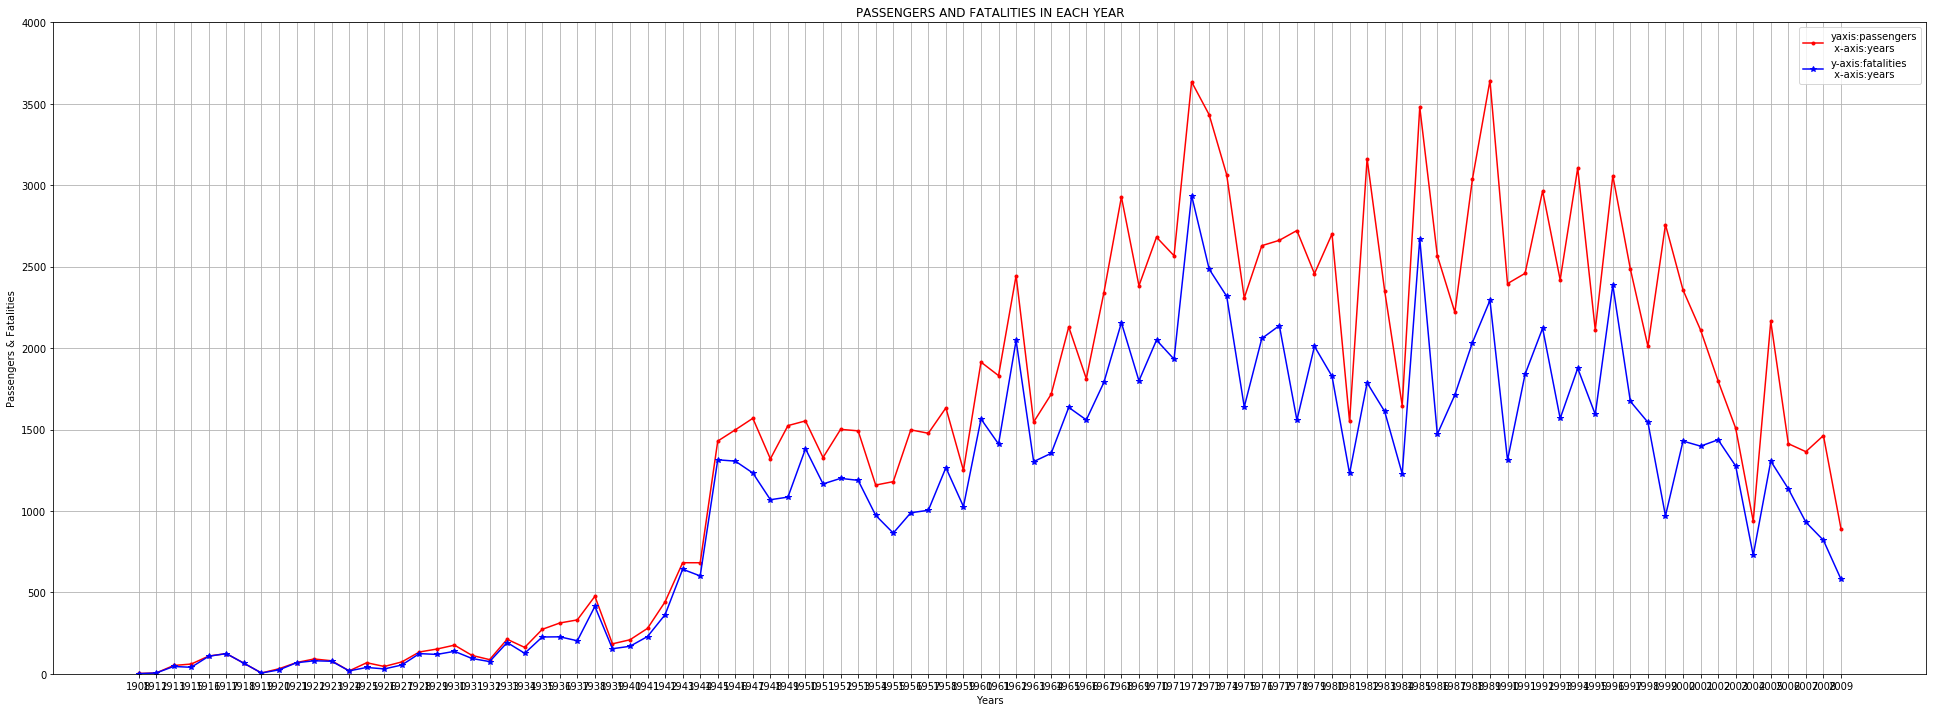

In [15]:
#-Number of passengers per year & fatalities in the same plot 
gouped_data=data.groupby(["year"])
l=[]
a=[]
yr=list(data['year'])
year_set=set(yr)
yr=sorted(year_set)
for name,group in grouped_data:
    l.append(group['Aboard'].sum())
    a.append(group['Fatalities'].sum())
plt.figure(figsize=(27,10))
plt.plot(yr,l,marker='.',linestyle='-',color='red',label="yaxis:passengers\n x-axis:years")
plt.plot(yr,a,marker='*',linestyle='-',ms=6,color='blue',label="y-axis:fatalities\n x-axis:years")
plt.legend()
plt.ylabel('Passengers & Fatalities')
plt.xlabel('Years')
plt.title('PASSENGERS AND FATALITIES IN EACH YEAR')
plt.grid()
plt.ylim(0,4000)
plt.tight_layout()
plt.show()


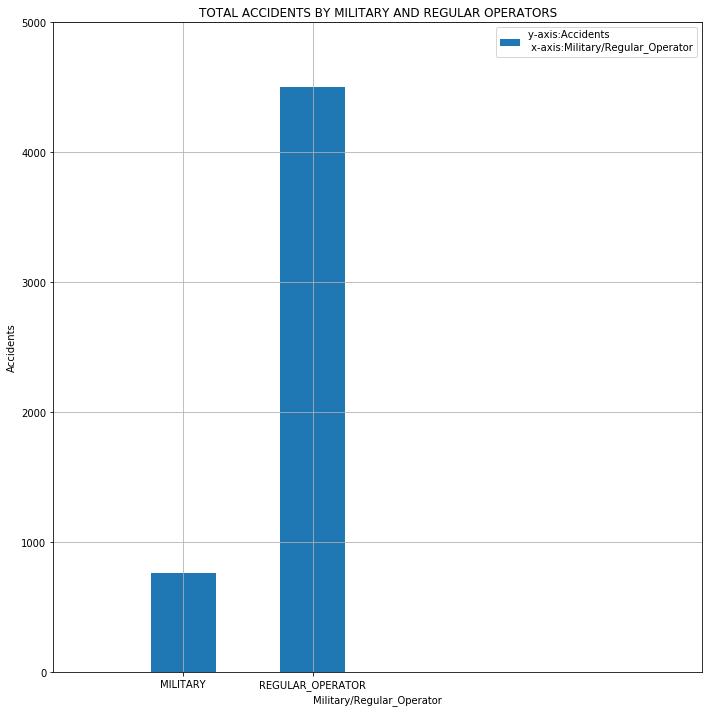

In [16]:
#-Plot the total number of accidents of military and regular operators 
x=data['Operator'].apply(lambda x:str(x)[:8])
mil=data[(x=='Military')]
mil=mil.shape[0]
reg=data[(x!='Military')]
reg=reg.shape[0]

plt.figure(figsize=(10,10))
a=["MILITARY","REGULAR_OPERATOR"]
b=[mil,reg]
x=list(range(1,3))
plt.bar(x,b,align='center',width=0.5,label="y-axis:Accidents \n x-axis:Military/Regular_Operator")
plt.xticks(x,a)
plt.xlabel('Military/Regular_Operator')
plt.ylabel('Accidents')
plt.title('TOTAL ACCIDENTS BY MILITARY AND REGULAR OPERATORS')
plt.legend()
plt.xlim(0,5)
plt.ylim(0,5000)
plt.grid()
plt.tight_layout()
plt.show()

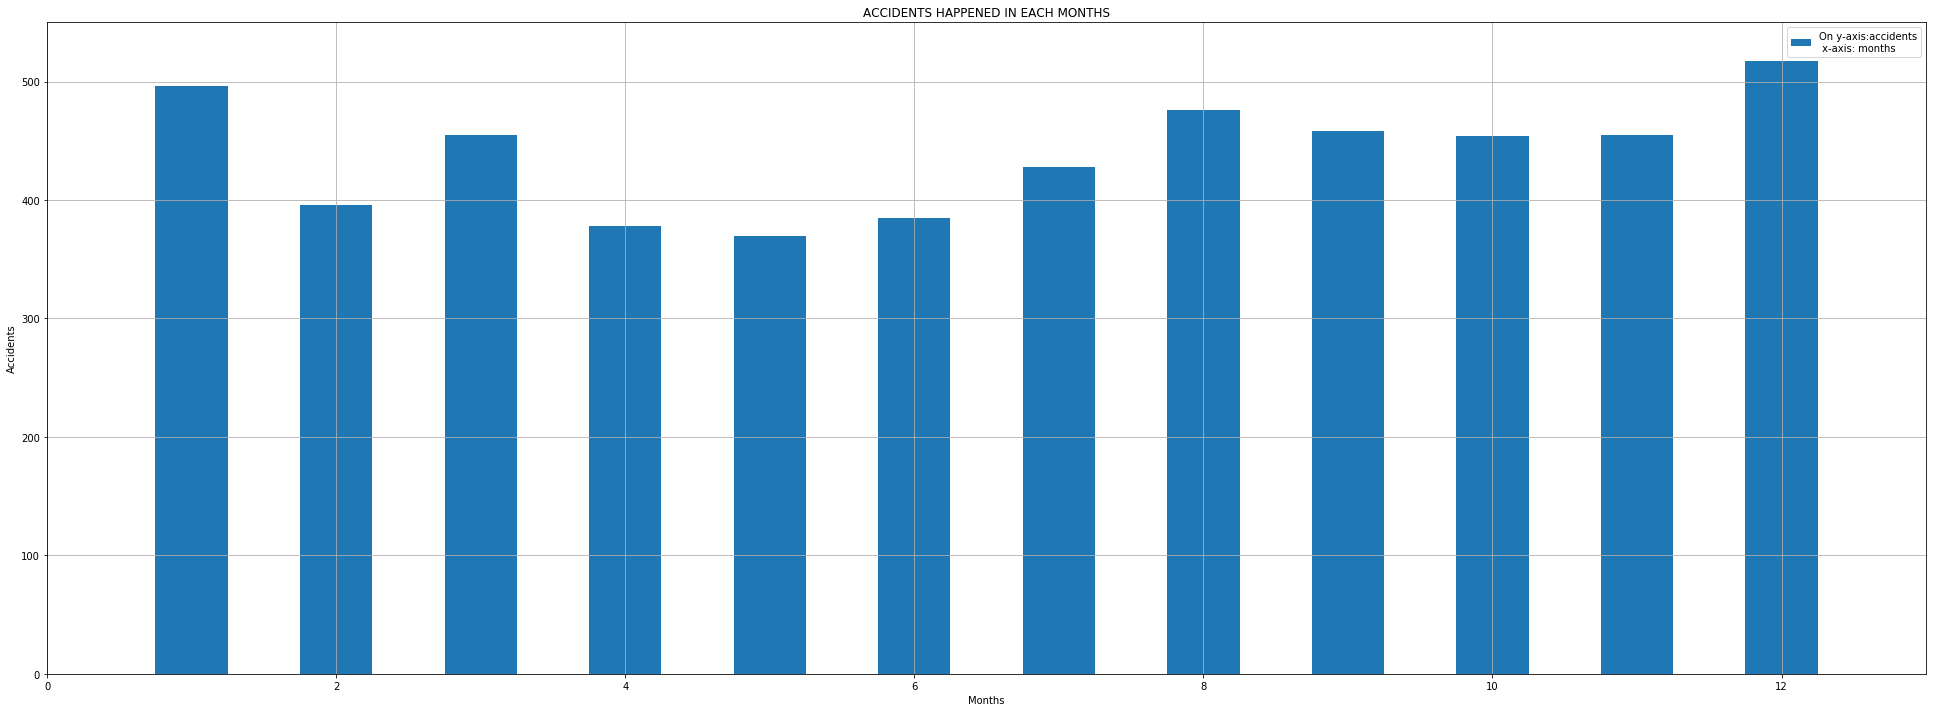

In [17]:
#-Count of accidents by month
mth=list(data["month"].value_counts().index)
a=data['month'].value_counts().tolist()
mth=list(map(int,mth))
a=list(map(int,a))
plt.figure(figsize=(27,10))
plt.bar(mth,a,width=0.5,label="On y-axis:accidents\n x-axis: months")
plt.legend()
plt.xlabel('Months')
plt.ylabel('Accidents')
plt.title('ACCIDENTS HAPPENED IN EACH MONTHS')
plt.grid()
plt.xlim(0,13)
plt.ylim(0,550)
plt.tight_layout()
plt.show()




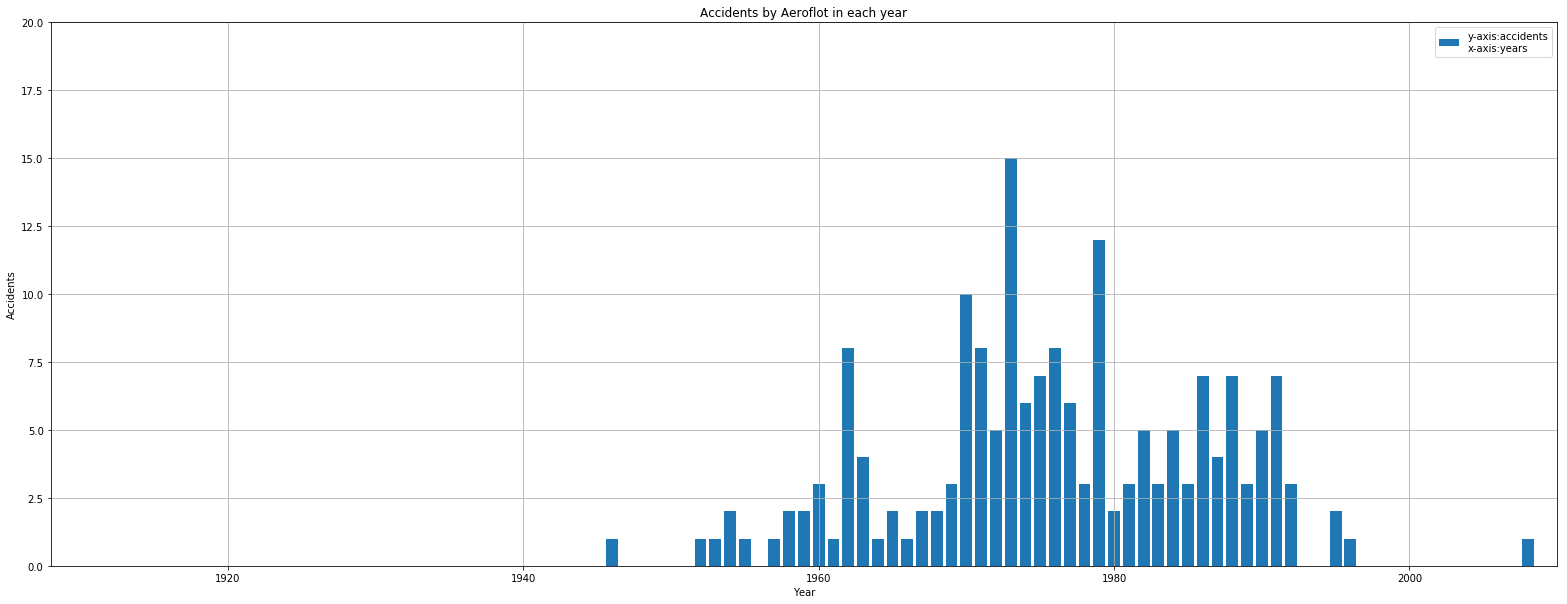

In [34]:
#-The number of accidents for the operator Aeroflot per year
fil=data[data['Operator']=='Aeroflot']
yr=list(fil["year"].value_counts().index)
yr=list(map(int,yr))
a=list(fil['year'].value_counts().tolist())
a=list(map(int,a))

plt.figure(figsize=(27,10))
plt.bar(yr,a,label="y-axis:accidents\nx-axis:years")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('Accidents by Aeroflot in each year')
plt.xlim(1908,2010)
plt.ylim(0,20)
plt.grid()
plt.show()

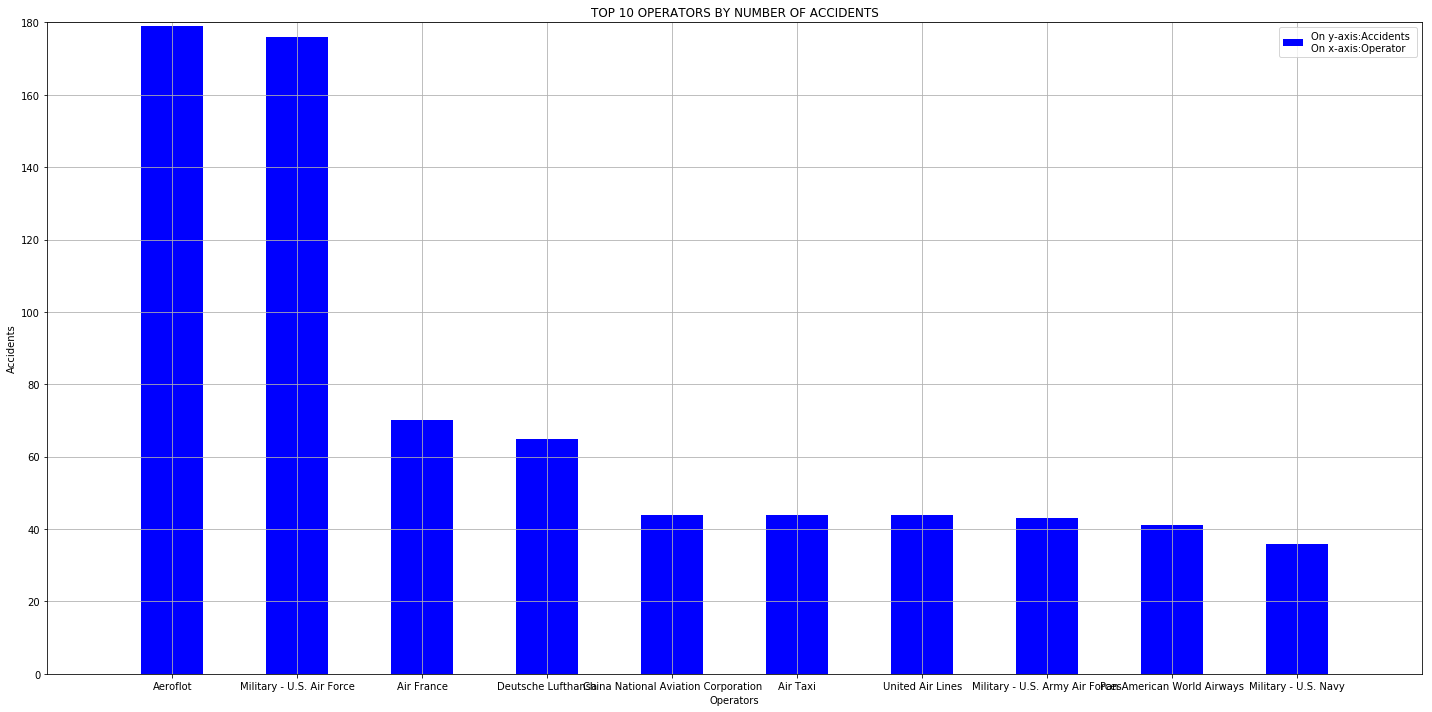

In [19]:
#-Top 10 operators by number of accidents
a=list(data['Operator'].value_counts().head(10).index)
b=data['Operator'].value_counts().head(10).tolist()
x=list(range(1,11))
plt.figure(figsize=(20,10))
plt.bar(x,b,color='blue',align='center',width=0.5,label="On y-axis:Accidents \nOn x-axis:Operator")
plt.xticks(x,a)
plt.xlabel('Operators')
plt.ylabel('Accidents')
plt.title('TOP 10 OPERATORS BY NUMBER OF ACCIDENTS')
plt.legend()
plt.xlim(0,11)
plt.ylim(0,180)
plt.grid()
plt.tight_layout()
plt.show()